<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [18]:
!pip install ggplot

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [19]:
from tqdm import tqdm_notebook

In [20]:
df_wine = pd.read_csv('winequality-red.csv', sep=';')

In [21]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df_wine.loc[:, 'quality'] = (df_wine.loc[:, 'quality'] > 5).astype(int)

In [23]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

In [24]:
X[:10]

array([[  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90000000e+00,   7.60000000e-02,   1.10000000e+01,
          3.40000000e+01,   9.97800000e-01,   3.51000000e+00,
          5.60000000e-01,   9.40000000e+00],
       [  7.80000000e+00,   8.80000000e-01,   0.00000000e+00,
          2.60000000e+00,   9.80000000e-02,   2.50000000e+01,
          6.70000000e+01,   9.96800000e-01,   3.20000000e+00,
          6.80000000e-01,   9.80000000e+00],
       [  7.80000000e+00,   7.60000000e-01,   4.00000000e-02,
          2.30000000e+00,   9.20000000e-02,   1.50000000e+01,
          5.40000000e+01,   9.97000000e-01,   3.26000000e+00,
          6.50000000e-01,   9.80000000e+00],
       [  1.12000000e+01,   2.80000000e-01,   5.60000000e-01,
          1.90000000e+00,   7.50000000e-02,   1.70000000e+01,
          6.00000000e+01,   9.98000000e-01,   3.16000000e+00,
          5.80000000e-01,   9.80000000e+00],
       [  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [27]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [28]:
scores = []

for d in xrange(1, 20):
    model = DecisionTreeClassifier(max_depth=d, random_state=123)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())

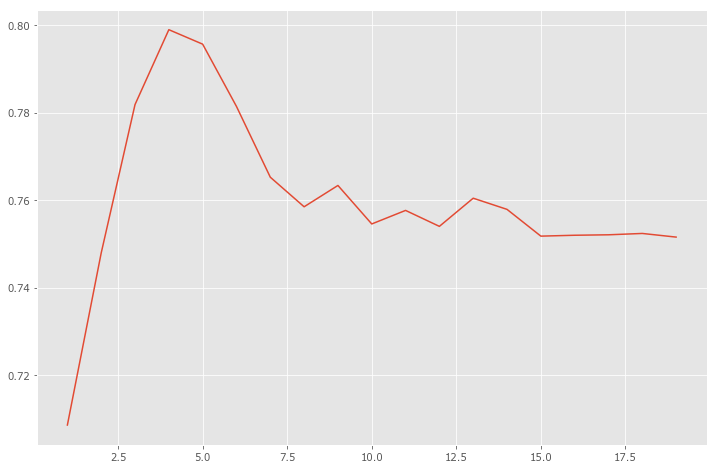

In [29]:
plt.plot(range(1,20), scores)

In [30]:
# При мере качества roc-auc виден явный пик на глубине 4
# Если выбрать меру качества accuracy, то выбрать оптимальную глубину окажется не так просто.

# Воспользуемся validation_curve
# По сути - этот метод делает тоже самое что наш цикл с cross_val_score, но в результате возвращаются мера качества
# как на тестовой части каждого из фолдов, так и на обучающей части

In [31]:
model = DecisionTreeClassifier(random_state=123)
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth',
                                             range(1, 20), n_jobs=-1, cv=5, scoring='roc_auc')

In [32]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

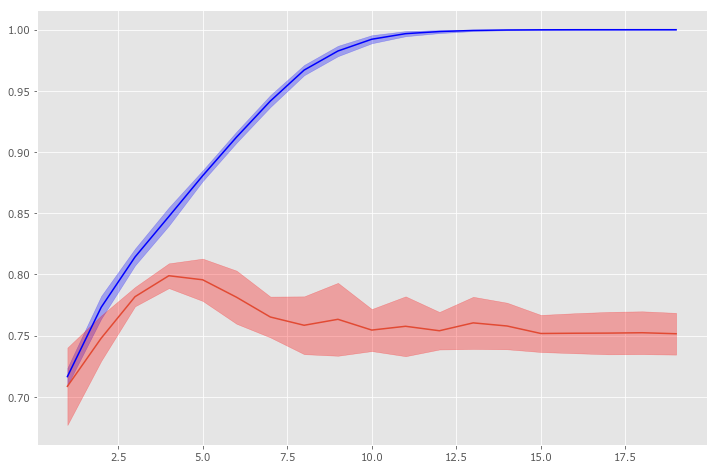

In [33]:
d = range(1,20)
plt.plot(d, train_mean, color='b')
plt.plot(d, test_mean)

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [34]:
# При roc-auc видем тот же самый пик
# Если выбрать меру качества accuracy, то на той глубине, где accuracy был наибольший (где-то в районе 13) ошибка на 
# на трейновой части минимальная - то есть очень сильное переобучение.

# Основываясь, во-первых, на том, что по roc-auc виден пик при max_depth=4, и во-вторых на том, что переобучение по 
# accuracy не такое сильное при max_depth=4, а качество будет повыше, чем в окрестности, то я бы выбрал глубину = 4

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [35]:
# Your Code Here
model.fit(X_train,y_train)
feature = model.feature_importances_

In [36]:
print feature

[ 0.05983479  0.11174774  0.05262419  0.04578369  0.08658162  0.06177974
  0.07868708  0.0716876   0.04999032  0.10982664  0.2714566 ]


Построим график

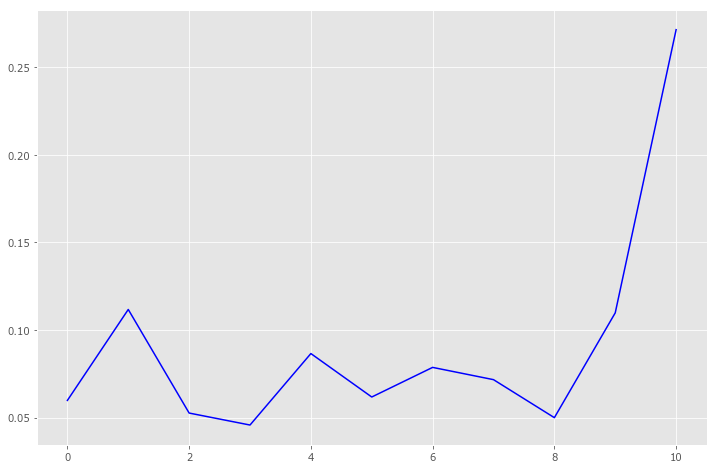

In [37]:
plt.plot(feature, color='b')

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

Посмотрим на тестовую выборку:

ROC AUC SCORE: 0.762187192118


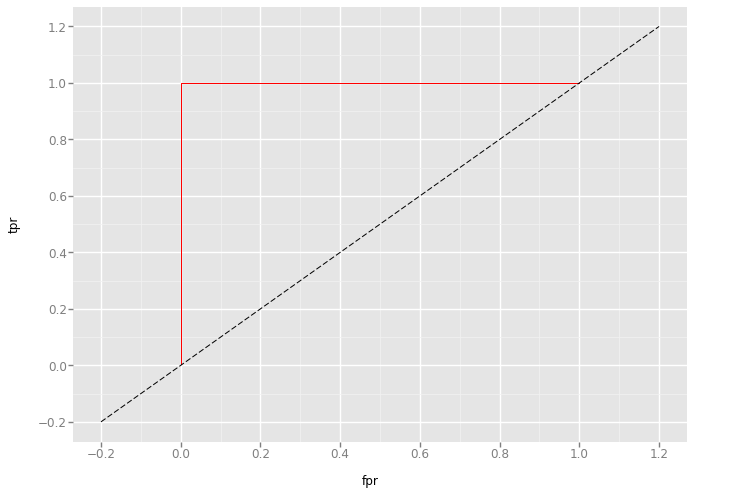

<ggplot: (17820662)>

In [42]:
# Your Code Here
model = DecisionTreeClassifier(max_depth=4,random_state=123)
model.fit(X_train,y_train)
result = model.predict(X_test)
y_scores =  model.predict_proba(X_test)
#print result, y_scores
fpr, tpr, thresholds = roc_curve(result, y_scores[:,1])
print "ROC AUC SCORE:", roc_auc_score(y_test, y_scores[:,1])
df = pd.DataFrame(fpr,tpr)
ggplot(df, aes(x='fpr', y='tpr')) + geom_line(color="red", linetype='solid') + geom_abline(linetype='dashed')

In [43]:
print df

                 0
0.005988  0.000000
0.077844  0.000000
0.604790  0.000000
0.658683  0.000000
0.892216  0.000000
1.000000  0.000000
1.000000  0.150327
1.000000  0.470588
1.000000  0.477124
1.000000  0.679739
1.000000  0.718954
1.000000  0.810458
1.000000  0.856209
1.000000  1.000000
[ 0.00598802  0.07784431  0.60479042  0.65868263  0.89221557  1.          1.
  1.          1.          1.          1.          1.          1.          1.        ]


Теперь на обучающую выборку:

ROC AUC SCORE: 0.848817882746


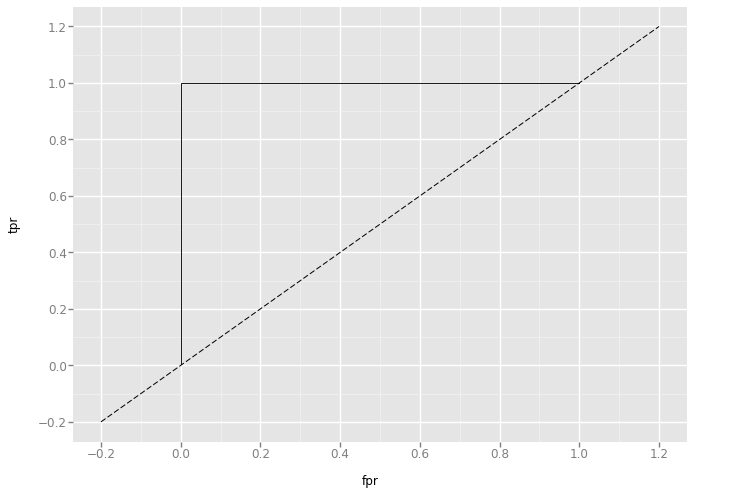

<ggplot: (19917253)>

In [75]:
result = model.predict(X_train)
y_scores =  model.predict_proba(X_train)
#print result, y_scores
fpr, tpr, thresholds = roc_curve(result, y_scores[:,1])
print "ROC AUC SCORE:", roc_auc_score(y_train, y_scores[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot.ggplot(df, ggplot.aes(x='fpr', y='tpr')) +\
    ggplot.geom_line(color="Blue",linetype='solid') +\
    ggplot.geom_abline(linetype='dashed')

In [76]:
print fpr
print tpr

[ 0.          0.          0.          0.          0.          0.
  0.14021572  0.45762712  0.46841294  0.69799692  0.71956857  0.76271186
  0.85053929  0.98921418  1.        ]
[ 0.0047619   0.05714286  0.57777778  0.65555556  0.91428571  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.        ]


Построим Cross-Val 

In [59]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.7421875  0.7421875  0.7578125  0.7265625  0.7372549]
Accuracy: 0.74 (+/- 0.02)


И теперь посмотрим на долю верно классифицированных объектов.

In [60]:
result = model.predict(X_test)
tr = np.isclose(result,y_test)
print tr.mean()

0.6875


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

Для начала посмотрим на Bagging 

In [67]:
# Your Code Here
model = BaggingClassifier()
train_scores, test_scores = validation_curve(model, X_train, y_train, 'n_estimators',
                                             range(10, 110, 10), n_jobs=-1, cv=5, scoring='roc_auc')

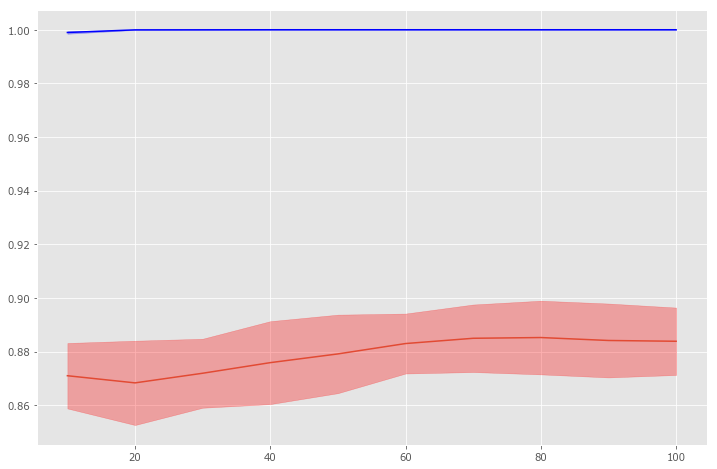

In [68]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)
d = range(10, 110, 10)
plt.plot(d, train_mean, color='b')
plt.plot(d, test_mean)

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

Пик - на 70-80 деревьях, работает в целом лучше, чем одно дерево решений.
Теперь применим случайный лес.

In [69]:
model = RandomForestClassifier()
train_scores, test_scores = validation_curve(model, X_train, y_train, 'n_estimators',
                                             range(10, 110, 10), n_jobs=-1, cv=5, scoring='roc_auc')

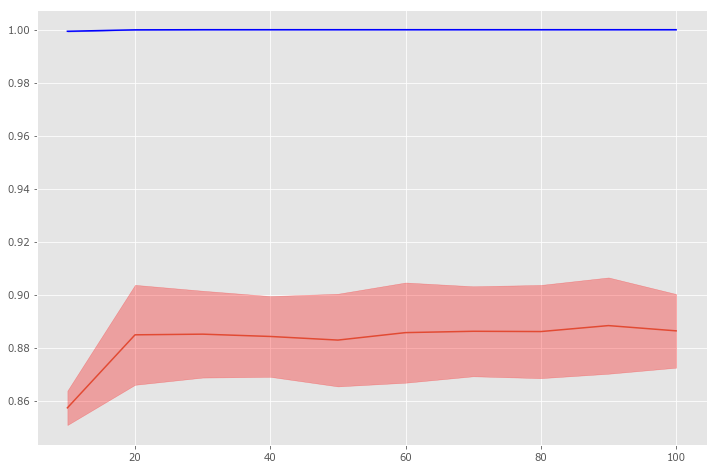

In [70]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)
d = range(10, 110, 10)
plt.plot(d, train_mean, color='b')
plt.plot(d, test_mean)

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

Пик на 90 деревьях, и чуть ближе к 0.90, чем у Bagging. В целом, roc-auc у Bagging и RandomForest лучше чем на одном дереве решений.

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [77]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Your Code Here
parameters = {'n_estimators':range(10, 110, 10), 'max_depth':range(1,11)}
rf = RandomForestClassifier()
model = GridSearchCV(rf,parameters)
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Посмотрим на лучший набор параметров:

In [91]:
model.best_params_ 

{'max_depth': 10, 'n_estimators': 60}

In [93]:
model.best_score_

0.80531665363565286

Теперь запустим кросс валидацию

In [98]:
model = RandomForestClassifier(max_depth=10, n_estimators=60)
scores = cross_val_score(model, X_train, y_train, cv=5)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.796875    0.8125      0.8125      0.83203125  0.81568627]
Accuracy: 0.81 (+/- 0.02)


Доля верно классифицированных объектов:

In [101]:
model.fit(X_train, y_train)
result = model.predict(X_test)
tr = np.isclose(result,y_test)
print tr.mean()

0.784375


На 0.1 больше чем на дереве решений! И теперь roc_auc:

In [102]:
result = model.predict(X_test)
y_scores =  model.predict_proba(X_test)
#print result, y_scores
fpr, tpr, thresholds = roc_curve(result, y_scores[:,1])
print "ROC AUC SCORE:", roc_auc_score(y_test, y_scores[:,1])

ROC AUC SCORE: 0.85521182266


И снова на 0.1 больше чем на дереве решений.

The end.